# PDS NumPy Workshop

## Structure

1 - NumPy
* Motivation for using NumPy instead of standard Python lists
* NumPy basics - what are ndarrays/numpy arrays, creating arrays with lists (of dimensions 1, 2, and 3), ndim, shape, size, dtype, np.zeros, np.ones, arange, linspace
* Indexing and slicing with multidimensional arrays, reshaping and reshaping with -1 as argument
* Stacking (vstack, hstack)
* Math operations with numpy - adding/subtracting with same size, adding/subtracting/multiplying array by constant with broadcasting, elementwise product, matrix product, aggregate functions like sum(), min(), max()
* Linear algebra with np.linalg, solving systems of linear equations, finding eigenvalues of matrix, inverse, matrix power

2 - PCA with MNIST
* explain MNIST dataset and goal - classifying digits based on their grayscale pixel values
* explain PCA - dimensionality reduction to get the directions where the image varies most
* now actual PCA/code
* a - Preprocess data to convert to mean 0 and stdev 0
* b - Compute covariances and eigenvalue/eigenvectors, choose top k eigenvectors to capture variance
* c - Project training images onto reduced dimensionality eigenbasis and reproject to standard basis
* d - Project test images onto eigenbasis and back
* e - Test the transformed test images vs the transformed training images with labels using k nearest neighbors

## Numpy Basics

### ndarrays

In [2]:
# Generally use Python lists to process "arrays of numbers in Python"
ls = [1,2,3,4]

In [3]:
ls

[1, 2, 3, 4]

In [4]:
# Even though the elements in a given list can be of different types, can get slow when dealing with large amounts 
# of data and it's not easy to do complex math/linear algebra with them

In [5]:
# That's why we use NumPy instead - Python library for scientific computing and linear algebra that is based on 
# its "ndarray" data structure.

In [6]:
import numpy as np # this is the standard way to import it

In [7]:
# One dimensional array (vector)
vec = np.array([1,2,3,4])

In [8]:
vec

array([1, 2, 3, 4])

In [9]:
# Two dimensional array (matrix)
mat = np.array([[1,2,3],[4,5,6]])

In [10]:
mat

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
# Three dimensional array (3-d tensor)
tensor = np.array([[[1,2,3], [4,5,6]], [[7,8,9], [10, 11, 12]]])

In [12]:
tensor

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [13]:
# In general, can manipulate arrays with an arbitrary number of dimensions

In [14]:
# To get the number of dimensions of an array, use ndim.
print(vec.ndim) # 1
print(mat.ndim) # 2
print(tensor.ndim) # 3

1
2
3


In [15]:
# To get the shape of an array, use shape
print(vec.shape) 
print(mat.shape)
print(tensor.shape)

(4,)
(2, 3)
(2, 2, 3)


In [16]:
# To get the number of elements in an array, use size
print(vec.size) 
print(mat.size)
print(tensor.size)

4
6
12


In [17]:
# NumPy has convenient ways to quickly construct arrays without manually creating a list first.
zeros = np.zeros((3, 4)) # creates 3 x 4 matrix filled with zeros

In [18]:
zeros

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [19]:
ones = np.ones((3, 4)) # creates 3 x 4 matrix filled with ones

In [20]:
ones

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [21]:
nums = np.arange(10) # creates vector filled with numbers from 0 to 9, inclusive

In [22]:
nums

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
linear = np.linspace(0, 10, 50) # creates vector filled with 50 equally spaced numbers from 0 to 10, inclusive

In [24]:
linear

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

### Indexing

In [25]:
# Indexing into 1-D NumPy arrays is very similar to indexing into Python lists

In [26]:
arr = np.arange(9)**2

In [27]:
arr

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64])

In [28]:
arr[0] # NumPy arrays are 0-indexed, like lists in Python and arrays in Java/C

0

In [29]:
arr[0:2] # element at index 0 is included, element at index 2 is not, just like in Python

array([0, 1])

In [30]:
# can also iterate through 1-D ndarrays like you would through lists
for elem in arr:
    print(elem)

0
1
4
9
16
25
36
49
64


In [31]:
# Multidimensional arrays need an index for each of their axes/dimensions

In [32]:
multi = np.array([[1,2,3,4,5],[6, 7, 8, 9, 10], [11, 12, 13, 14, 15]])

In [33]:
multi

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [34]:
multi[0, 2] # element in row 0, column 2

3

In [35]:
multi[0:2, 1:5] # array with elements in rows 0-1 (row 2 not included) and columns 1-4

array([[ 2,  3,  4,  5],
       [ 7,  8,  9, 10]])

In [36]:
multi[:, 2:4] # array with elements in all rows and columns 2-3 of the original

array([[ 3,  4],
       [ 8,  9],
       [13, 14]])

In [37]:
multi[-1, :] # array with the last row of the original

array([11, 12, 13, 14, 15])

### Reshaping and stacking

In [38]:
# Can change the shape of an array - useful when we need data to be in a specific form for a computation

In [39]:
orig = np.arange(9)
arr = orig.reshape(3, 3) # reshape returns a new array with the same values as the original in the specified shape

In [40]:
orig

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [41]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [42]:
orig.resize(3, 3) # resize changes the shape of the array in place

In [43]:
orig

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [44]:
orig.resize(9)

In [45]:
new_arr = orig.reshape(3, -1) # when -1 is an argument to reshape, NumPy figures out what the missing dimensions 
                              # must be on its own

In [46]:
new_arr # in this case, since the original array has 9 elements, if its reshaped version has 3 rows it must have 3 
        # columns

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [47]:
a = np.arange(6).reshape(2, 3)
b = np.arange(8).reshape(2, 4)
c = np.arange(9).reshape(3, 3)

In [48]:
a

array([[0, 1, 2],
       [3, 4, 5]])

In [49]:
b

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [50]:
c

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [51]:
np.hstack((a, b)) # if two arrays have the same number of rows, can stack them horizontally with hstack

array([[0, 1, 2, 0, 1, 2, 3],
       [3, 4, 5, 4, 5, 6, 7]])

In [52]:
np.vstack((a, c)) # if two arrays have the same number of columns, can stack them vertically with vstack

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [53]:
mat = np.arange(9).reshape(3, 3)

In [54]:
mat

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [55]:
mat.T # transposes an array

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

### Useful functions on arrays

In [56]:
a = np.arange(1, 9)

In [57]:
a

array([1, 2, 3, 4, 5, 6, 7, 8])

In [58]:
a.sort()

In [59]:
a

array([1, 2, 3, 4, 5, 6, 7, 8])

In [60]:
a.max() # max element

8

In [61]:
a.min() # min element

1

In [62]:
a.sum() # sum of all elements

36

In [63]:
a.prod() # product of all alements

40320

In [64]:
a.mean() # average of elements

4.5

In [65]:
a.std() # standard deviation of elements

2.29128784747792

In [66]:
# Let's do a speed test - sum all numbers from 0 to 10^8-1

In [67]:
l = [i for i in range(10**8)] # using Python lists

In [68]:
%%time
sum(l)

CPU times: user 1.57 s, sys: 4.04 s, total: 5.61 s
Wall time: 7.69 s


4999999950000000

In [69]:
np_list = np.arange(10**8) # using NumPy

In [70]:
%%time
np_list.sum() # should be aboust 20x as fast

CPU times: user 219 ms, sys: 862 ms, total: 1.08 s
Wall time: 1.98 s


4999999950000000

### Basic math

In [71]:
a = np.arange(9).reshape(3, 3)
b = (np.arange(9)**2).reshape(3, 3)

In [72]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [73]:
b

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

In [74]:
a + b # can add arrays with the same shape elementwise

array([[ 0,  2,  6],
       [12, 20, 30],
       [42, 56, 72]])

In [75]:
a + 3 # can add a constant to all elements in an array

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [76]:
a * b # can multiply arrays with the same shape elementwise

array([[  0,   1,   8],
       [ 27,  64, 125],
       [216, 343, 512]])

In [77]:
a * 3 # can multiply a constant by all elements in an array

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24]])

### Linear algebra

In [78]:
# NumPy almost certainly has all the built-in functions you'll need for linear algebra

In [79]:
vec1 = np.arange(9)
vec2 = np.arange(9)**2

In [80]:
vec1

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [81]:
vec2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64])

In [82]:
vec1.dot(vec2) # dot product of two vectors (1-D arrays)

1296

In [83]:
mat1 = np.arange(9).reshape(3, 3)
mat2 = (np.arange(9)**2).reshape(3, 3)

In [84]:
mat1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [85]:
mat2

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

In [86]:
mat1 @ mat2 # matrix product of two matrices (2-D arrays)

array([[ 81, 114, 153],
       [216, 312, 432],
       [351, 510, 711]])

In [87]:
mat1 @ mat1 @ mat1 # can be awkward to write, so ...

array([[ 180,  234,  288],
       [ 558,  720,  882],
       [ 936, 1206, 1476]])

In [88]:
np.linalg.matrix_power(mat1, 3) # raise matrix to a power

array([[ 180,  234,  288],
       [ 558,  720,  882],
       [ 936, 1206, 1476]])

In [89]:
eig_vals, eig_vectors = np.linalg.eig(mat1)

In [90]:
eig_vals # eigenvalues

array([ 1.33484692e+01, -1.34846923e+00, -1.15433316e-15])

In [91]:
eig_vectors # columns in this matrix are the corresponding (normalized) eigenvectors

array([[ 0.16476382,  0.79969966,  0.40824829],
       [ 0.50577448,  0.10420579, -0.81649658],
       [ 0.84678513, -0.59128809,  0.40824829]])

In [92]:
np.linalg.det(mat2) # matrix determinant

-216.00000000000006

In [93]:
np.trace(mat1) # trace of a matrix

12

In [94]:
np.linalg.inv(mat2) # matrix inverse

array([[ 0.93055556, -0.61111111,  0.18055556],
       [-1.5       ,  0.66666667, -0.16666667],
       [ 0.625     , -0.16666667,  0.04166667]])

## Handwritten Digit Recognition with the MNIST Dataset

In [95]:
from utils import load_mnist, make_batches, display_mnist_image

X_train, X_test, y_train, y_test = load_mnist()
X_train = X_train / 255
X_test = X_test / 255

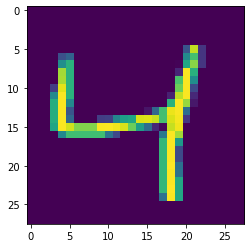

In [102]:
display_mnist_image(X_train[2])